<a href="https://colab.research.google.com/github/LakshitaAgg15/MachineLearning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

# reading csv file
data=pd.read_csv("Titanic-Dataset.csv")
df=pd.DataFrame(data)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [53]:
# statistical analysis
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


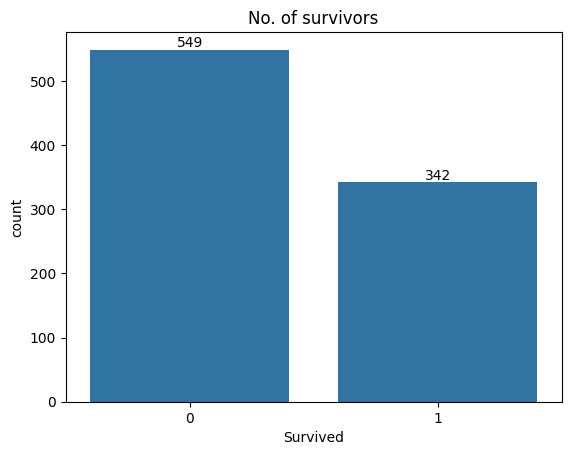

In [54]:
# Visualising Data

ax=sns.countplot(x="Survived",data=data)
ax.bar_label(ax.containers[0])
plt.title('No. of survivors')
plt.show()

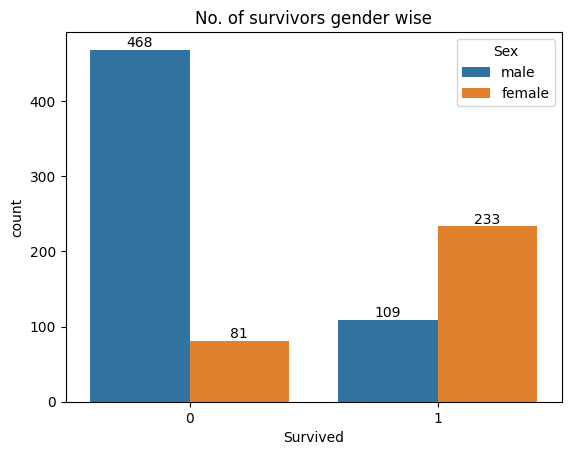

In [55]:
ax=sns.countplot(x="Survived",hue="Sex",data=data)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('No. of survivors gender wise')
plt.show()

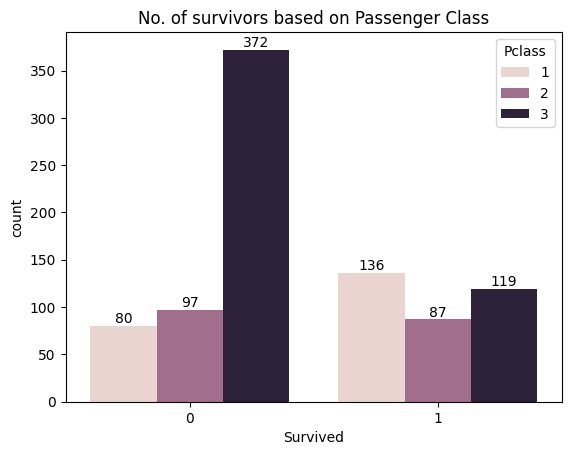

In [56]:
ax=sns.countplot(x="Survived",hue="Pclass",data=data)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('No. of survivors based on Passenger Class')
plt.show()

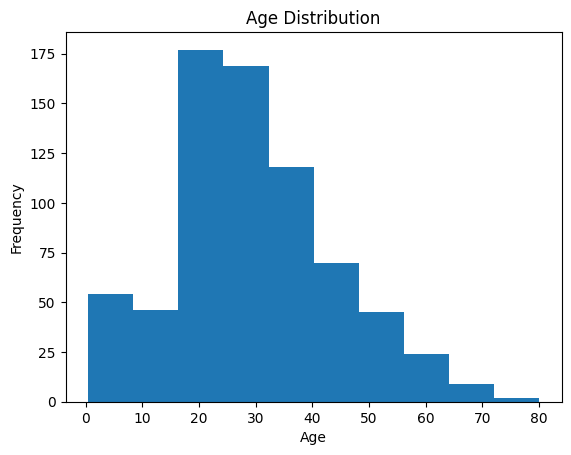

In [57]:
data["Age"].plot.hist()
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

In [58]:
# checking null values
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [60]:
data.shape

(891, 12)

In [61]:
# Dropping column with null values
data.drop("Cabin",axis=1,inplace=True)

In [62]:
# Removing all null values
data.dropna(inplace=True)
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [63]:
# Creting dummy variables for categorical columns
gender=pd.get_dummies(data['Sex'],drop_first=True)
gender


,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [64]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
885,True,False
886,False,True
887,False,True
889,False,False


In [65]:
pclass=pd.get_dummies(data['Pclass'],drop_first=True)
pclass

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
885,False,True
886,True,False
887,False,False
889,False,False


In [66]:
# combining new columns
data=pd.concat([data,gender,embark,pclass],axis=1)

In [67]:
# Removing old columns
data.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)


In [68]:
# Columns to apply regression
X=data.drop("Survived",axis=1)
y=data["Survived"]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel=LogisticRegression()

In [73]:
X_train.columns = X_train.columns.astype(str)
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
X_test.columns = X_test.columns.astype(str)
pred=logmodel.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, logmodel.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 77.10%


In [76]:
from sklearn.metrics import classification_report

classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

# # confusion matrix structure
#    PN PY
# AN .. ..
# AY .. ..

array([[102,  24],
       [ 25,  63]])